In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
!pip3 install seaborn

     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01


In [4]:
(X_train, y_train),(X_test,y_test)= keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 6s 1us/step


In [5]:
len(X_train)

60000

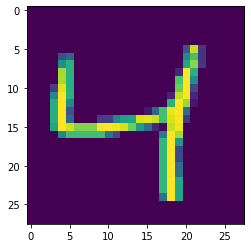

In [10]:
plt.imshow(X_train[2])

In [17]:
X_train= X_train/255
X_test= X_test/255

In [18]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3006 - accuracy: 0.9174
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1428 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0812 - accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0542 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.027

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 866us/step - loss: 0.0848 - accuracy: 0.9771


[0.0848129391670227, 0.9771000146865845]

In [20]:
y_predicted= model.predict(X_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

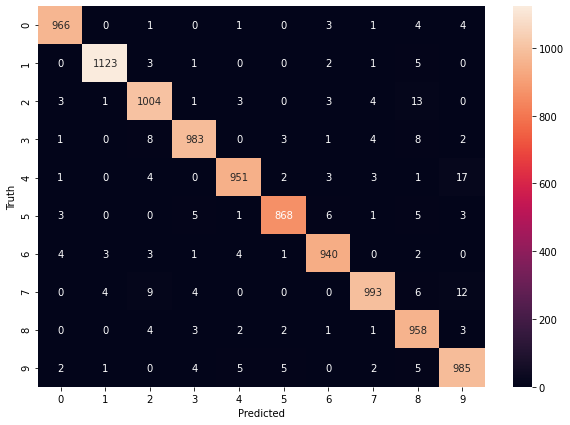

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [26]:
y_predicted_labels[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]